# **Effects of Barge Movements on the Environment of New Orleans**

By Madeline Nellis and Caroline Casella

[Github Repository Link](https://github.com/madelinenellis/madelinenellis.github.io.git)


To do: 
- add text explanation for all boxes/clean up (completed up to water quality)
- water data analysis 
- models
- references


# Introduction #

This project is a collaboration between Caroline Casella and Madeline Nellis for our Data Science class with Aron Culotta. We will be examining how the rates of barge movements down the Mississippi river affect the air quality, water quality, effect on wildlife, and the sinking of New Orleans.

Climate change and the changing environment are increasily worrysome and apparent, especially in New Orleans, a city that is affect by increasing amounts of hurricanes. Humans notoriously harm the environment around them, and we are seeking to find out if barges in the Mississippi are harming New Orleans. 

Through our analysis we are exploring the following questions.
1. How do barge movements impact different aspects of air quality (methane, CO2, etc.)?
2. How do increased barge movements change water composition?

The impacts of the industry may alter the physical and local environment in New Orleans, and further the affects of climate change. This is important because if the barge movements are causing significant change to the environment it is important for the people of New Orleans, the people being effected, to know and be able to take neccessary legislative actions.

# Housekeeping

In [77]:
# first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Data-Science-Project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Data-Science-Project


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Examining Barge Movements
The first step needed is to read the dataset into a dataframe. Once the data has been read, we will clean it to prepare it for analysis and add any other data that we deem important.



 ### Reading the Data
The barge data was collected by the United States Department of Agriculture. 

Website: https://agtransport.usda.gov/Barge/Downbound-Barge-Grain-Movements-Tons-/n4pw-9ygw


In [79]:
# Read in Barge Movement file
df = pd.read_csv("DownboundBarge.csv")
df

,Date,Week,Month,Year,Commodity,Lock,Tons
0,06/27/2020,26,6,2020,Corn,Ark Lock 1,1400.0
1,06/27/2020,26,6,2020,Other Grain,Ark Lock 1,0.0
2,06/27/2020,26,6,2020,Soybeans,Ark Lock 1,11200.0
3,06/27/2020,26,6,2020,Wheat,Ark Lock 1,23800.0
4,06/27/2020,26,6,2020,Corn,Miss Locks 27,452800.0
...,...,...,...,...,...,...,...
12367,10/01/2022,39,9,2022,Wheat,Miss Locks 27,1600.0
12368,10/01/2022,39,9,2022,Corn,Ohio Olmsted,54550.0
12369,10/01/2022,39,9,2022,Other Grain,Ohio Olmsted,0.0
12370,10/01/2022,39,9,2022,Soybeans,Ohio Olmsted,45850.0


This data set ranges from 2003 to 2022. The date object in this frame needs to be converted to a datetime object so that we can compare with other data sets.

In [80]:
# convert date to datetime object
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df["date"] = df["Date"].dt.date

Checking the dtypes of the dataframe to ensure they are formatted correctly: 

In [81]:
df.dtypes

Date         datetime64[ns]
Week                  int64
Month                 int64
Year                  int64
Commodity            object
Lock                 object
Tons                float64
date                 object
dtype: object

Now we are going to create a few smaller data frames so that we can get a better sense of the data. The first is the total number of tons moved per week.

In [82]:
# Generate table with mean number of tons moved per week in the year over all the years in the data set
tonsPerWeek = df.groupby('Week', as_index=True).agg({'Tons': 'mean'})
tonsPerWeek.head()

,Tons
Week,
1,43772.872340
2,50313.557447
3,53843.773109
4,53187.381356
5,50246.974895


This graph displays the tons per week.

Text(0, 0.5, 'Tons')

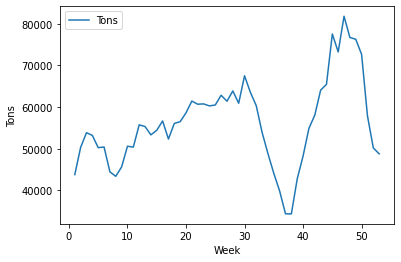

In [83]:
tonsPerWeek.plot()
plt.ylabel('Tons')

Now we are going to look at the different commodities, and what is moved the most.

In [84]:
#Generate table with total number of tons per commodity
mostMovedCommodity = df.groupby('Commodity', as_index=True).agg({'Tons': 'sum'})
mostMovedCommodity

,Tons
Commodity,
Corn,420725635.0
Other Grain,8220839.0
Soybeans,223048957.0
Wheat,38194050.0


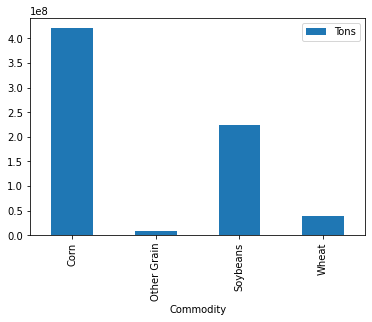

In [85]:
mostMovedCommodity.pivot_table(
    index="Commodity",
    values="Tons").plot.bar()

In [86]:
#Tons of Each Commodity Per Week
mostMovedCommodityPerWeek = df.groupby(["Week", "Commodity"])["Tons"].mean()
mostMovedCommodityPerWeek

Week  Commodity  
1     Corn            88800.203390
      Other Grain      3372.568966
      Soybeans        74889.372881
      Wheat            7344.593220
2     Corn           105349.396552
                         ...      
52    Wheat            6459.107143
53    Corn           106683.083333
      Other Grain      1200.000000
      Soybeans        81566.750000
      Wheat            5596.166667
Name: Tons, Length: 212, dtype: float64

The following data frame and graph show the number of moved tons per day over the entire data set, so from 2003 to 2022. This can show us changes in barge movements over a long period of time.

In [87]:
#Tons moved per day
tonsPerDay = df.groupby(['Date']).agg({'Tons': 'sum'})
tonsPerDay

,Tons
Date,
2003-01-04,619632.0
2003-01-11,817443.0
2003-01-18,1034636.0
2003-01-25,885924.0
2003-02-01,628789.0
...,...
2022-09-03,240500.0
2022-09-10,249727.0
2022-09-17,209600.0


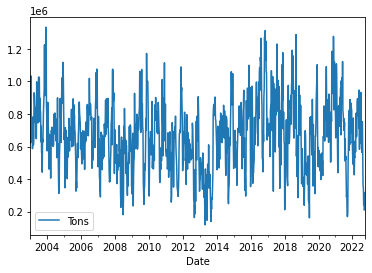

In [88]:
tonsPerDay.plot.line()

We also want to see if there are seasonal changes in the barge movements, so we grouped the data by day and month of the year and took averages over all the years. 

In [89]:
tonsPerDayMean = tonsPerDay.reset_index()
tonsPerDayMean['dayMonth'] = tonsPerDayMean['Date'].dt.strftime("%m-%d")
tonsPerDayMean = tonsPerDayMean.groupby(['dayMonth']).agg({'Tons': 'mean'})

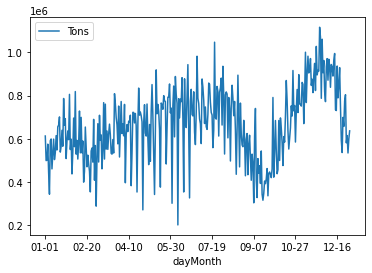

In [90]:
tonsPerDayMean.plot.line()

The barge movements steadily increase from January to August then decrease all of August and start to increase again from September until December and the decrease until the new year. Initial thoughts are that this could be attributed to weather and temperature changes in New Orleans.

# Examining Air Quality

The air quality data is collected from the Louisiana Department of Environmental Quality.

Website: https://airquality.deq.louisiana.gov/

This data has limitations. Our barge movement data goes back until 2003, but the air quality data is only one years worth of data from June 27th 2020 until June 21st 2021. Although we would like to look at barge movements relationships with air quality over a longer period of time, we can still look at the relationship within a year.

In [91]:
air = pd.read_csv("AirQualityHourIntervals.csv")
air

,Date,H2S-PPB,ITEMP-DEGC,METHANE-PPM,NMOC-PPM,PM25-UG/M3,SO2-PPB,THC-PPM,WDIR-DEG,WSP-MPH
0,Jun 27 2020 12:00AM,1.0,24.3,2.11,0.00,16.7,0.0,2.10,142.0,2.0
1,Jun 27 2020 1:00AM,2.0,24.1,2.23,0.00,17.1,0.0,2.21,134.0,3.0
2,Jun 27 2020 2:00AM,1.0,24.1,2.30,0.00,17.3,0.0,2.27,138.0,5.0
3,Jun 27 2020 3:00AM,1.0,24.2,2.31,0.00,15.6,0.0,2.28,139.0,4.0
4,Jun 27 2020 4:00AM,2.0,24.3,2.33,0.00,16.0,0.0,2.30,157.0,3.0
...,...,...,...,...,...,...,...,...,...,...
8573,Jun 21 2021 7:00AM,2.0,27.3,2.15,0.01,8.0,0.2,2.12,153.0,3.0
8574,Jun 21 2021 8:00AM,2.0,27.1,2.16,0.01,11.4,0.2,2.14,200.0,1.0
8575,Jun 21 2021 9:00AM,2.0,27.0,3.98,0.01,8.5,0.3,3.95,230.0,3.0
8576,Jun 21 2021 10:00AM,2.0,27.0,2.16,0.01,11.1,0.3,2.14,182.0,5.0


In [92]:
air = air.rename(columns={'METHANE-PPM': 'Methane'})

Below we converted Date to datetime object to make it comparable with other data sets. And separated the time out into a separate column because the barge movement datetime object does not include time.

In [93]:
#convert Date to datetime object
from datetime import datetime
air['Date'] = pd.to_datetime(air["Date"], errors='coerce')

In [94]:
#separate date and time for mean by day calculations
air["date"] = air["Date"].dt.date
air["time"] = air["Date"].dt.time

Here we displayed the dtypes to ensure they are all correct.

In [95]:
air.dtypes

Date          datetime64[ns]
H2S-PPB              float64
ITEMP-DEGC           float64
Methane              float64
NMOC-PPM             float64
PM25-UG/M3           float64
SO2-PPB              float64
THC-PPM              float64
WDIR-DEG             float64
WSP-MPH              float64
date                  object
time                  object
dtype: object

Now we start some exploratory analysis to better understand the air quality data.

### Methane

Here we separated out just the methane data in order to do a deeper analysis of its effect. Methane is a hydrocarbon that is a primary component of natural gas. Methane is also a greenhouse gas (GHG), so its presence in the atmosphere affects the earth's temperature and climate system. Methane is produced naturally (cows), but emission may also human caused by landfills, oil and natural gas systems, agricultural activities, coal mining, stationary and mobile combustion, wastewater treatment, and certain industrial processes

In [96]:
#calculate the mean Methane per day 
meanMethanePerDay = air.groupby('date', as_index=True).agg({'Methane': 'mean'})
meanMethanePerDay

,Methane
date,
2020-06-27,2.120000
2020-06-28,2.984167
2020-06-29,2.861250
2020-06-30,4.554167
2020-07-01,5.987500
...,...
2021-06-17,2.047917
2021-06-18,1.932500
2021-06-19,2.711250


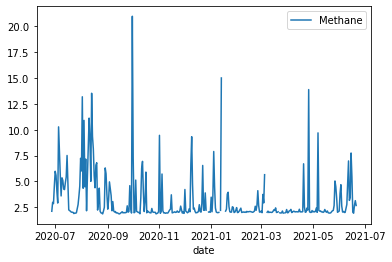

In [97]:
meanMethanePerDay.plot.line()

### Sulfur Dioxide

Next, we separated out the sulfure dioxide to analyze its effect. SO2 is used as the indicator for the larger group of gaseous sulfur oxides (SOx) because other gases of this group are usually found at much lower concentrations. Sulfur dioxide is mainly produced by fossil fuel combustion at power plants andother industrial facilities.

In [98]:
air = air.rename(columns={'SO2-PPB': 'SulfurDioxide'})

In [99]:
meanSDPerDay= air.groupby('date', as_index=True).agg({'SulfurDioxide': 'mean'})
meanSDPerDay

,SulfurDioxide
date,
2020-06-27,0.004167
2020-06-28,0.000000
2020-06-29,0.008333
2020-06-30,0.008696
2020-07-01,0.016667
...,...
2021-06-17,0.445833
2021-06-18,0.308696
2021-06-19,0.370833


### Hydrogen Sulfide

Hydrogen sulfide also occurs naturally in sewers, manure pits, well water, oil and gas wells, and volcanoes. Because it is heavier than air, hydrogen sulfide can collect in low-lying and enclosed spaces. It has immediate impacts on people if they come in contact with it, which can range from irritation to unconsciousness and death

In [100]:
air = air.rename(columns={'H2S-PPB': 'HydrogenSulfide'})

In [101]:
meanHSPerDay= air.groupby('date', as_index=True).agg({'HydrogenSulfide': 'mean'})
meanHSPerDay

,HydrogenSulfide
date,
2020-06-27,1.541667
2020-06-28,2.347826
2020-06-29,2.304348
2020-06-30,2.208333
2020-07-01,2.217391
...,...
2021-06-17,1.541667
2021-06-18,1.541667
2021-06-19,1.791667


###Particulate Matter

Particulate Matter (PM) is a mixture of solid and liquid particles that are suspended in the air. These are categorized into coarse, fine and ultrafine. It is used when describing pollutant levels where health impact from exposure considers amount of PM2.5 over a 24-hour period.

In [102]:
air = air.rename(columns={'PM25-UG/M3': 'PM'})

In [103]:
air

,Date,HydrogenSulfide,ITEMP-DEGC,Methane,NMOC-PPM,PM,SulfurDioxide,THC-PPM,WDIR-DEG,WSP-MPH,date,time
0,2020-06-27 00:00:00,1.0,24.3,2.11,0.00,16.7,0.0,2.10,142.0,2.0,2020-06-27,00:00:00
1,2020-06-27 01:00:00,2.0,24.1,2.23,0.00,17.1,0.0,2.21,134.0,3.0,2020-06-27,01:00:00
2,2020-06-27 02:00:00,1.0,24.1,2.30,0.00,17.3,0.0,2.27,138.0,5.0,2020-06-27,02:00:00
3,2020-06-27 03:00:00,1.0,24.2,2.31,0.00,15.6,0.0,2.28,139.0,4.0,2020-06-27,03:00:00
4,2020-06-27 04:00:00,2.0,24.3,2.33,0.00,16.0,0.0,2.30,157.0,3.0,2020-06-27,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
8573,2021-06-21 07:00:00,2.0,27.3,2.15,0.01,8.0,0.2,2.12,153.0,3.0,2021-06-21,07:00:00
8574,2021-06-21 08:00:00,2.0,27.1,2.16,0.01,11.4,0.2,2.14,200.0,1.0,2021-06-21,08:00:00
8575,2021-06-21 09:00:00,2.0,27.0,3.98,0.01,8.5,0.3,3.95,230.0,3.0,2021-06-21,09:00:00
8576,2021-06-21 10:00:00,2.0,27.0,2.16,0.01,11.1,0.3,2.14,182.0,5.0,2021-06-21,10:00:00


In [104]:
meanPMPerDay= air.groupby('date', as_index=True).agg({'PM': 'mean'})
meanPMPerDay

,PM
date,
2020-06-27,14.950000
2020-06-28,11.258333
2020-06-29,21.104348
2020-06-30,20.866667
2020-07-01,25.700000
...,...
2021-06-17,15.865217
2021-06-18,9.352174
2021-06-19,4.791667


# Examining Water Quality




Data was collected from the United States Geological Survey at site number 7374000 on the Mississippi River.


In [151]:
water_qual = pd.read_csv('water_quality.tsv', sep='\t', lineterminator='\r')
water_qual

,agency_cd,site_no,datetime,"Turbidity, formazin nephelometric units (FNU) (Mean)",Unnamed: 4,"Turbidity, formazin nephelometric units (FNU) (Max)",Unnamed: 6,"Turbidity, formazin nephelometric units (FNU) (Min)",Unnamed: 8,"Gage height, feet (Mean)",...,"pH, water, unfiltered, field, standard units (Minimum)",Unnamed: 36,"pH, water, unfiltered, field, standard units (Median)",Unnamed: 38,"Discharge, cubic feet per second (Mean)",Unnamed: 40,"Dissolved oxygen, water, unfiltered, milligrams per liter (Mean)",Unnamed: 42,"Nitrate plus nitrite, water, in situ, milligrams per liter as nitrogen (Mean)",Unnamed: 44
0,\n5s,15s,20d,14n,10s,14n,10s,14n,10s,14n,...,14n,10s,14n,10s,14n,10s,14n,10s,14n,10s
1,\nUSGS,7374000,2021-12-07,48.1,P,66.4,P,39.6,P,10.21,...,7.9,P,8,P,286000,P,10.2,P,1.3,P
2,\nUSGS,7374000,2021-12-08,28.9,P,47.3,P,22.3,P,9.67,...,8,P,8,P,276000,P,10.3,P,1.31,P
3,\nUSGS,7374000,2021-12-09,25.1,P,33.2,P,18.4,P,9.12,...,8,P,8,P,264000,P,10.3,P,1.31,P
4,\nUSGS,7374000,2021-12-10,24.8,P,34.3,P,19.1,P,8.58,...,8,P,8,P,253000,P,10.2,P,1.27,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,\nUSGS,7374000,2022-12-03,21.2,P,23.5,P,19,P,8.66,...,8.1,P,8.1,P,242000,P,10.5,P,0.8,P
363,\nUSGS,7374000,2022-12-04,20.7,P,22.6,P,16.1,P,8.4,...,8.1,P,8.1,P,233000,P,10.5,P,0.78,P
364,\nUSGS,7374000,2022-12-05,23.1,P,33.3,P,18.1,P,7.97,...,8.1,P,8.1,P,224000,P,10.4,P,0.77,P
365,\nUSGS,7374000,2022-12-06,30.9,P,39.3,P,24.9,P,7.89,...,8.1,P,8.1,P,219000,P,10.3,P,0.81,P


In [152]:
#remove all the unneeded columns
del water_qual['Unnamed: 4']
del water_qual['Unnamed: 6']
del water_qual['Unnamed: 8']
del water_qual['Unnamed: 10']
del water_qual['Unnamed: 12']
del water_qual['Unnamed: 14']
del water_qual['Unnamed: 16']
del water_qual['Unnamed: 18']
del water_qual['Unnamed: 20']
del water_qual['Unnamed: 22']
del water_qual['Unnamed: 24']
del water_qual['Unnamed: 26']
del water_qual['Unnamed: 28']
del water_qual['Unnamed: 30']
del water_qual['Unnamed: 32']
del water_qual['Unnamed: 34']
del water_qual['Unnamed: 36']
del water_qual['Unnamed: 38']
del water_qual['Unnamed: 40']
del water_qual['Unnamed: 42']
del water_qual['Unnamed: 44']
del water_qual['agency_cd']
del water_qual['site_no']


In [155]:
water_qual

,datetime,"Turbidity, formazin nephelometric units (FNU) (Mean)","Turbidity, formazin nephelometric units (FNU) (Max)","Turbidity, formazin nephelometric units (FNU) (Min)",Gage Height Max,"Gage height, feet (Minimum)",Gage Height Mean,"Temperature, water, degrees Celsius (Maximum)","Temperature, water, degrees Celsius (Minimum)","Temperature, water, degrees Celsius (Mean)",...,"Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Mean)","Salinity, water, unfiltered, parts per thousand (Maximum)","Salinity, water, unfiltered, parts per thousand (Minimum)","Salinity, water, unfiltered, parts per thousand (Mean)","pH, water, unfiltered, field, standard units (Maximum)","pH, water, unfiltered, field, standard units (Minimum)","pH, water, unfiltered, field, standard units (Median)","Discharge, cubic feet per second (Mean)","Dissolved oxygen, water, unfiltered, milligrams per liter (Mean)","Nitrate plus nitrite, water, in situ, milligrams per liter as nitrogen (Mean)"
0,20d,14n,14n,14n,14n,14n,14n,14n,14n,14n,...,14n,14n,14n,14n,14n,14n,14n,14n,14n,14n
1,2021-12-07,48.1,66.4,39.6,10.21,9.55,9.95,12.1,11.8,11.9,...,442,0.2,0.2,0.2,8,7.9,8,286000,10.2,1.3
2,2021-12-08,28.9,47.3,22.3,9.67,9.07,9.48,11.9,11.6,11.8,...,462,0.2,0.2,0.2,8,8,8,276000,10.3,1.31
3,2021-12-09,25.1,33.2,18.4,9.12,8.55,8.95,11.9,11.6,11.8,...,461,0.2,0.2,0.2,8,8,8,264000,10.3,1.31
4,2021-12-10,24.8,34.3,19.1,8.58,8.32,8.49,12.3,11.9,12.1,...,469,0.2,0.2,0.2,8,8,8,253000,10.2,1.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2022-12-03,21.2,23.5,19,8.66,8.35,8.49,11.9,11.7,11.8,...,479,0.2,0.2,0.2,8.2,8.1,8.1,242000,10.5,0.8
363,2022-12-04,20.7,22.6,16.1,8.4,7.88,8.15,11.9,11.7,11.8,...,461,0.2,0.2,0.2,8.1,8.1,8.1,233000,10.5,0.78
364,2022-12-05,23.1,33.3,18.1,7.97,7.59,7.79,12.1,11.8,11.9,...,472,0.2,0.2,0.2,8.1,8.1,8.1,224000,10.4,0.77
365,2022-12-06,30.9,39.3,24.9,7.89,7.25,7.59,12.2,11.8,12,...,471,0.2,0.2,0.2,8.1,8.1,8.1,219000,10.3,0.81


###Turbidity

In [156]:
water_qual = water_qual.rename(columns={'Turbidity, formazin nephelometric units (FNU) (Mean)': 'Turbidity Mean'})
water_qual = water_qual.rename(columns={'Turbidity, formazin nephelometric units (FNU) (Max)':'Turbidity Max'})
water_qual = water_qual.rename(columns={'Turbidity, formazin nephelometric units (FNU) (Min)': 'Turbidity Min'})
water_qual

,datetime,Turbidity Mean,Turbidity Max,Turbidity Min,Gage Height Max,"Gage height, feet (Minimum)",Gage Height Mean,"Temperature, water, degrees Celsius (Maximum)","Temperature, water, degrees Celsius (Minimum)","Temperature, water, degrees Celsius (Mean)",...,"Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius (Mean)","Salinity, water, unfiltered, parts per thousand (Maximum)","Salinity, water, unfiltered, parts per thousand (Minimum)","Salinity, water, unfiltered, parts per thousand (Mean)","pH, water, unfiltered, field, standard units (Maximum)","pH, water, unfiltered, field, standard units (Minimum)","pH, water, unfiltered, field, standard units (Median)","Discharge, cubic feet per second (Mean)","Dissolved oxygen, water, unfiltered, milligrams per liter (Mean)","Nitrate plus nitrite, water, in situ, milligrams per liter as nitrogen (Mean)"
0,20d,14n,14n,14n,14n,14n,14n,14n,14n,14n,...,14n,14n,14n,14n,14n,14n,14n,14n,14n,14n
1,2021-12-07,48.1,66.4,39.6,10.21,9.55,9.95,12.1,11.8,11.9,...,442,0.2,0.2,0.2,8,7.9,8,286000,10.2,1.3
2,2021-12-08,28.9,47.3,22.3,9.67,9.07,9.48,11.9,11.6,11.8,...,462,0.2,0.2,0.2,8,8,8,276000,10.3,1.31
3,2021-12-09,25.1,33.2,18.4,9.12,8.55,8.95,11.9,11.6,11.8,...,461,0.2,0.2,0.2,8,8,8,264000,10.3,1.31
4,2021-12-10,24.8,34.3,19.1,8.58,8.32,8.49,12.3,11.9,12.1,...,469,0.2,0.2,0.2,8,8,8,253000,10.2,1.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2022-12-03,21.2,23.5,19,8.66,8.35,8.49,11.9,11.7,11.8,...,479,0.2,0.2,0.2,8.2,8.1,8.1,242000,10.5,0.8
363,2022-12-04,20.7,22.6,16.1,8.4,7.88,8.15,11.9,11.7,11.8,...,461,0.2,0.2,0.2,8.1,8.1,8.1,233000,10.5,0.78
364,2022-12-05,23.1,33.3,18.1,7.97,7.59,7.79,12.1,11.8,11.9,...,472,0.2,0.2,0.2,8.1,8.1,8.1,224000,10.4,0.77
365,2022-12-06,30.9,39.3,24.9,7.89,7.25,7.59,12.2,11.8,12,...,471,0.2,0.2,0.2,8.1,8.1,8.1,219000,10.3,0.81


In [148]:
gageHeight = water_qual.filter(['Gage Height Max','Gage Height Min', 'Gage Height Mean'], axis=1)
gageHeight

ValueError: ignored

### Gage Height

In [ ]:
water_qual = water_qual.rename(columns={'Gage height, feet (Mean)': 'Gage Height Mean'})
water_qual = water_qual.rename(columns={'Turbidity, formazin nephelometric units (FNU) (Max)':'Turbidity Max'})
water_qual = water_qual.rename(columns={'Turbidity, formazin nephelometric units (FNU) (Min)': 'Turbidity Min'})


In [ ]:
gageHeight = water_qual.filter(['Gage Height Max','Gage Height Min', 'Gage Height Mean'], axis=1)
gageHeight

# Comparisons

### Methane Gas

Methane, a hydrocarbon, is an extremely potent greenhouse gas that contributes the the effects of climate change. It is 25 times more powerful than CO2 at trapping heat in the atmosphere and is generated by a multitude of sources such as fossil fuel production, transportation, and decay. Not only does it warm the planet at a rapid rate, but it reduces the amount of oxygen in the air contributing to harmful effects for both humans and the environment. It is estimated that exposure to ground-level ozone, which is formed by methane, causes around 1 million premature deaths around the world each year. 



Started by joining the data of the Mean Methane per day with the tons of barge movements. 

In [114]:
#join mean methane per day and tons per day into a dataframe so we can graph
methaneTonsPerDayJoin = tonsPerDay.join(meanMethanePerDay, lsuffix="Date", how='outer')

In [115]:
methaneTonsPerDayJoin["Tons"] = tonsPerDay

# removing Missing Values
methaneTonsPerDayJoin.dropna(inplace=True)
  
methaneTonsPerDayJoin.head(10)

,Tons,Methane
2020-06-27,868840.0,2.120000
2020-07-04,658856.0,2.914583
2020-07-11,824916.0,4.277083
2020-07-18,746792.0,2.190000
2020-07-25,838643.0,1.940000
2020-08-01,890050.0,6.015833
2020-08-08,626068.0,5.404545
2020-08-15,921810.0,8.136667
2020-08-22,921644.0,4.356250
2020-08-29,759740.0,6.309167


We then scaled the values to provide a better visual comparison between the two variables


In [116]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 
scaler = MinMaxScaler()
 
meth_scaled = scaler.fit_transform(methaneTonsPerDayJoin.to_numpy())
meth_scaled = pd.DataFrame(meth_scaled, columns=['Tons', 'Methane'])
 
print("Scaled Dataset Using MinMaxScaler")
meth_scaled.head()

Scaled Dataset Using MinMaxScaler


,Tons,Methane
0,0.512689,0.029048
1,0.262174,0.157275
2,0.460287,0.377152
3,0.367083,0.040344
4,0.476663,0.000000


<Figure size 2400x1200 with 0 Axes>

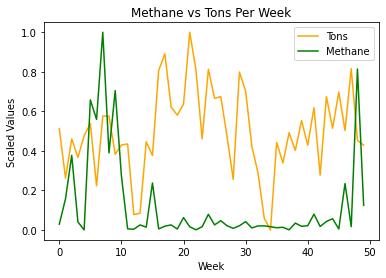

In [117]:
plt.figure(figsize=(16, 8), dpi=150)
  
# we have passed colors as a list
meth_scaled.plot(label='Methane', color=['orange', 'green'])
  
# adding title
plt.title('Methane vs Tons Per Week')
  
# adding label to x-axis
plt.xlabel('Week')
plt.ylabel('Scaled Values')
  
# adding legend.
plt.legend()

In [118]:
methaneTonsPerDayJoin.corr()

,Tons,Methane
Tons,1.000000,-0.073034
Methane,-0.073034,1.000000


### Sulfur Dioxide Comparison

Blurb similar to the methane one needed


In [119]:
#join mean Sulfur Dioxide per day and tons per day into a dataframe so we can graph
SDTonsPerDayJoin = tonsPerDay.join(meanSDPerDay, lsuffix="Date", how='outer')

In [120]:
SDTonsPerDayJoin["Tons"] = tonsPerDay

# removing Missing Values
SDTonsPerDayJoin.dropna(inplace=True)
  
SDTonsPerDayJoin.head(10)

,Tons,SulfurDioxide
2020-06-27,868840.0,0.004167
2020-07-04,658856.0,2.900000
2020-07-11,824916.0,0.712500
2020-07-18,746792.0,0.104167
2020-07-25,838643.0,0.095833
2020-08-01,890050.0,0.170833
2020-08-08,626068.0,0.329167
2020-08-15,921810.0,0.795833
2020-08-22,921644.0,0.520833
2020-08-29,759740.0,0.504167


In [121]:
scaler = MinMaxScaler()
 
SD_scaled = scaler.fit_transform(SDTonsPerDayJoin.to_numpy())
SD_scaled = pd.DataFrame(SD_scaled, columns=['Tons', 'SulfurDioxide'])
 
print("Scaled Dataset Using MinMaxScaler")
SD_scaled.head()

Scaled Dataset Using MinMaxScaler


,Tons,SulfurDioxide
0,0.512689,0.000000
1,0.262174,1.000000
2,0.460287,0.244604
3,0.367083,0.034532
4,0.476663,0.031655


<Figure size 2400x1200 with 0 Axes>

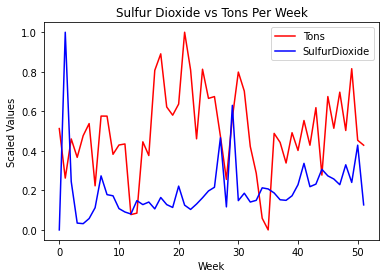

In [122]:
plt.figure(figsize=(16, 8), dpi=150)
  
# we have passed colors as a list
SD_scaled.plot(label='SulfurDioxide', color=['red', 'blue'])
  
# adding title
plt.title('Sulfur Dioxide vs Tons Per Week')
  
# adding label to x-axis
plt.xlabel('Week')
plt.ylabel('Scaled Values')
  
# adding legend.
plt.legend()

In [123]:
SDTonsPerDayJoin.corr()

,Tons,SulfurDioxide
Tons,1.000000,-0.072108
SulfurDioxide,-0.072108,1.000000


### Hydrogen Sulfide Comparison

Blurb needed

In [124]:
#join mean Sulfur Dioxide per day and tons per day into a dataframe so we can graph
HSTonsPerDayJoin = tonsPerDay.join(meanHSPerDay, lsuffix="Date", how='outer')

In [125]:
HSTonsPerDayJoin["Tons"] = tonsPerDay

# removing Missing Values
HSTonsPerDayJoin.dropna(inplace=True)
  
HSTonsPerDayJoin.head(10)

,Tons,HydrogenSulfide
2020-06-27,868840.0,1.541667
2020-07-04,658856.0,1.416667
2020-07-11,824916.0,1.583333
2020-07-18,746792.0,1.458333
2020-07-25,838643.0,1.583333
2020-08-01,890050.0,3.375000
2020-08-08,626068.0,3.250000
2020-08-15,921810.0,4.958333
2020-08-22,921644.0,1.916667
2020-08-29,759740.0,3.541667


In [126]:
scaler = MinMaxScaler()
 
HS_scaled = scaler.fit_transform(HSTonsPerDayJoin.to_numpy())
HS_scaled = pd.DataFrame(HS_scaled, columns=['Tons', 'HydrogenSulfide'])
 
print("Scaled Dataset Using MinMaxScaler")
HS_scaled.head()

Scaled Dataset Using MinMaxScaler


,Tons,HydrogenSulfide
0,0.512689,0.196078
1,0.262174,0.166667
2,0.460287,0.205882
3,0.367083,0.176471
4,0.476663,0.205882


<Figure size 2400x1200 with 0 Axes>

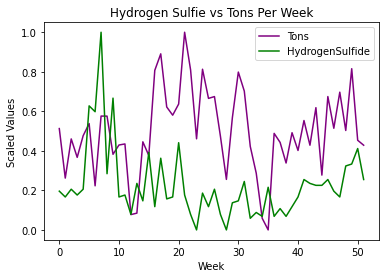

In [127]:
plt.figure(figsize=(16, 8), dpi=150)
  
# we have passed colors as a list
HS_scaled.plot(label='HydrogenSulfide', color=['purple', 'green'])
  
# adding title
plt.title('Hydrogen Sulfie vs Tons Per Week')
  
# adding label to x-axis
plt.xlabel('Week')
plt.ylabel('Scaled Values')
  
# adding legend.
plt.legend()

In [128]:
HSTonsPerDayJoin.corr()

,Tons,HydrogenSulfide
Tons,1.000000,0.073799
HydrogenSulfide,0.073799,1.000000


### Particulate Matter Comparison

Blurb needed

In [129]:
#join mean Particulate Matter per day and tons per day into a dataframe so we can graph
PMTonsPerDayJoin = tonsPerDay.join(meanPMPerDay, lsuffix="Date", how='outer')

In [130]:
PMTonsPerDayJoin["Tons"] = tonsPerDay

# removing Missing Values
PMTonsPerDayJoin.dropna(inplace=True)
  
PMTonsPerDayJoin.head(10)

,Tons,PM
2020-06-27,868840.0,14.950000
2020-07-04,658856.0,25.182609
2020-07-11,824916.0,17.808333
2020-07-18,746792.0,12.758333
2020-07-25,838643.0,6.808333
2020-08-01,890050.0,12.670833
2020-08-08,626068.0,12.200000
2020-08-15,921810.0,4.500000
2020-08-22,921644.0,12.837500
2020-08-29,759740.0,6.400000


In [131]:
scaler = MinMaxScaler()
 
PM_scaled = scaler.fit_transform(PMTonsPerDayJoin.to_numpy())
PM_scaled = pd.DataFrame(PM_scaled, columns=['Tons', 'ParticulateMatter'])
 
print("Scaled Dataset Using MinMaxScaler")
PM_scaled.head()

Scaled Dataset Using MinMaxScaler


,Tons,ParticulateMatter
0,0.512689,0.515600
1,0.262174,1.000000
2,0.460287,0.650910
3,0.367083,0.411848
4,0.476663,0.130182


<Figure size 2400x1200 with 0 Axes>

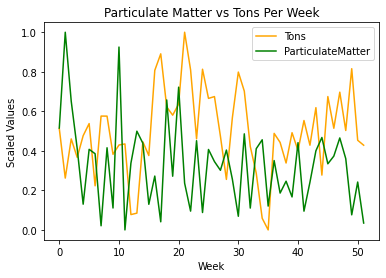

In [132]:
plt.figure(figsize=(16, 8), dpi=150)
  
# we have passed colors as a list
PM_scaled.plot(label='ParticulateMatter', color=['orange', 'green'])
  
# adding title
plt.title('Particulate Matter vs Tons Per Week')
  
# adding label to x-axis
plt.xlabel('Week')
plt.ylabel('Scaled Values')
  
# adding legend.
plt.legend()

In [133]:
PMTonsPerDayJoin.corr()

,Tons,PM
Tons,1.000000,-0.231036
PM,-0.231036,1.000000


# Models 

We are going to build a linear regression that will take in barge movements and predict the air quality, specifically the amount of methane in the air. This will help us answer one of our primary questions: Do barge movements in the Mississippi affect the air quality in New Orleans?

We are also going to use covariance to summarize the relationship between our quantitative variables: air quality, barge movement, water quality, and wildlife data. This will provide us with directionality to the relationship between the variables to analyze if we have a positive or negative relationship. We can further analyze these results by normalizing the covariance to obtain correlation between them. A covariance matrix may also be useful for our analysis to see all variables relationship at once. 



In [134]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

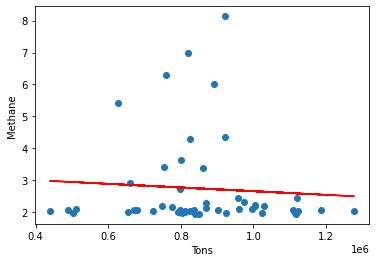

In [135]:
X = methaneTonsPerDayJoin.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = methaneTonsPerDayJoin.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Tons')
plt.ylabel('Methane')
plt.show()

## For the Future:
We plan to analyze the differences in barge movements with water quality data of the Mississippi River. We are currently working on scraping the USGS website to collect the water quality data and If time allows we hope to find a dataset on wildlife impacts. We plan to incorporate all of these factors in with the air quality data as well to provide a more in depth analysis of the overall system. 

# Final Insights Learned #

# References #

https://www.epa.gov/gmi/importance-methane#:~:text=Methane%20(CH4)%20is%20a,%2Dinfluenced)%20and%20natural%20sources.

https://www.epa.gov/so2-pollution/sulfur-dioxide-basics

https://www.indoorairhygiene.org/pm2-5-explained/#:~:text=Most%20studies%20indicate%20PM2.,breathing%20issues%20such%20as%20asthma. 

https://www.noaa.gov/news-release/increase-in-atmospheric-methane-set-another-record-during-2021#:~:text=Methane%20in%20the%20atmosphere%20is,ruminant%20animals%20such%20as%20cows.

https://www.unep.org/news-and-stories/story/methane-emissions-are-driving-climate-change-heres-how-reduce-them